In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


Data Loading And Initial Exploration


In [ ]:
df=pd.read_csv("WineQuality.csv")

In [5]:

print(f"Dataset shape : {df.shape[0]} rows X {df.shape[1]} columns")

Dataset shape : 1699 rows X 12 columns


In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,8.329397,0.526786,0.271403,2.549096,0.087544,16.048253,46.897874,0.996747,3.311263,0.657206,10.421607,5.638028
std,1.726301,0.178695,0.194009,1.399910,0.046900,10.490591,32.733365,0.001887,0.154309,0.169189,1.066080,0.809308
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.094784,1.900000,0.070000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.091000,22.000000,63.000000,0.997860,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#Missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df['quality'].value_counts().sort_index()

quality
3.000000    10
3.850377     1
3.897010     1
3.961616     1
3.989201     1
            ..
7.167815     1
7.325771     1
7.761854     1
7.832748     1
8.000000    18
Name: count, Length: 106, dtype: int64

Data Analysis


Quality categories:
quality_category
Low       763
Medium    684
High      252
Name: count, dtype: int64

Features correlation with quality:
quality                 1.000000
alcohol                 0.451470
sulphates               0.239841
citric acid             0.217785
fixed acidity           0.115421
residual sugar          0.005021
free sulfur dioxide    -0.044434
pH                     -0.052872
chlorides              -0.127046
total sulfur dioxide   -0.166649
density                -0.177091
volatile acidity       -0.376788
Name: quality, dtype: float64


/var/folders/8x/8z2zzzxx7xn7mf0hcm8wvtxm0000gn/T/ipykernel_7156/860632740.py:47: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


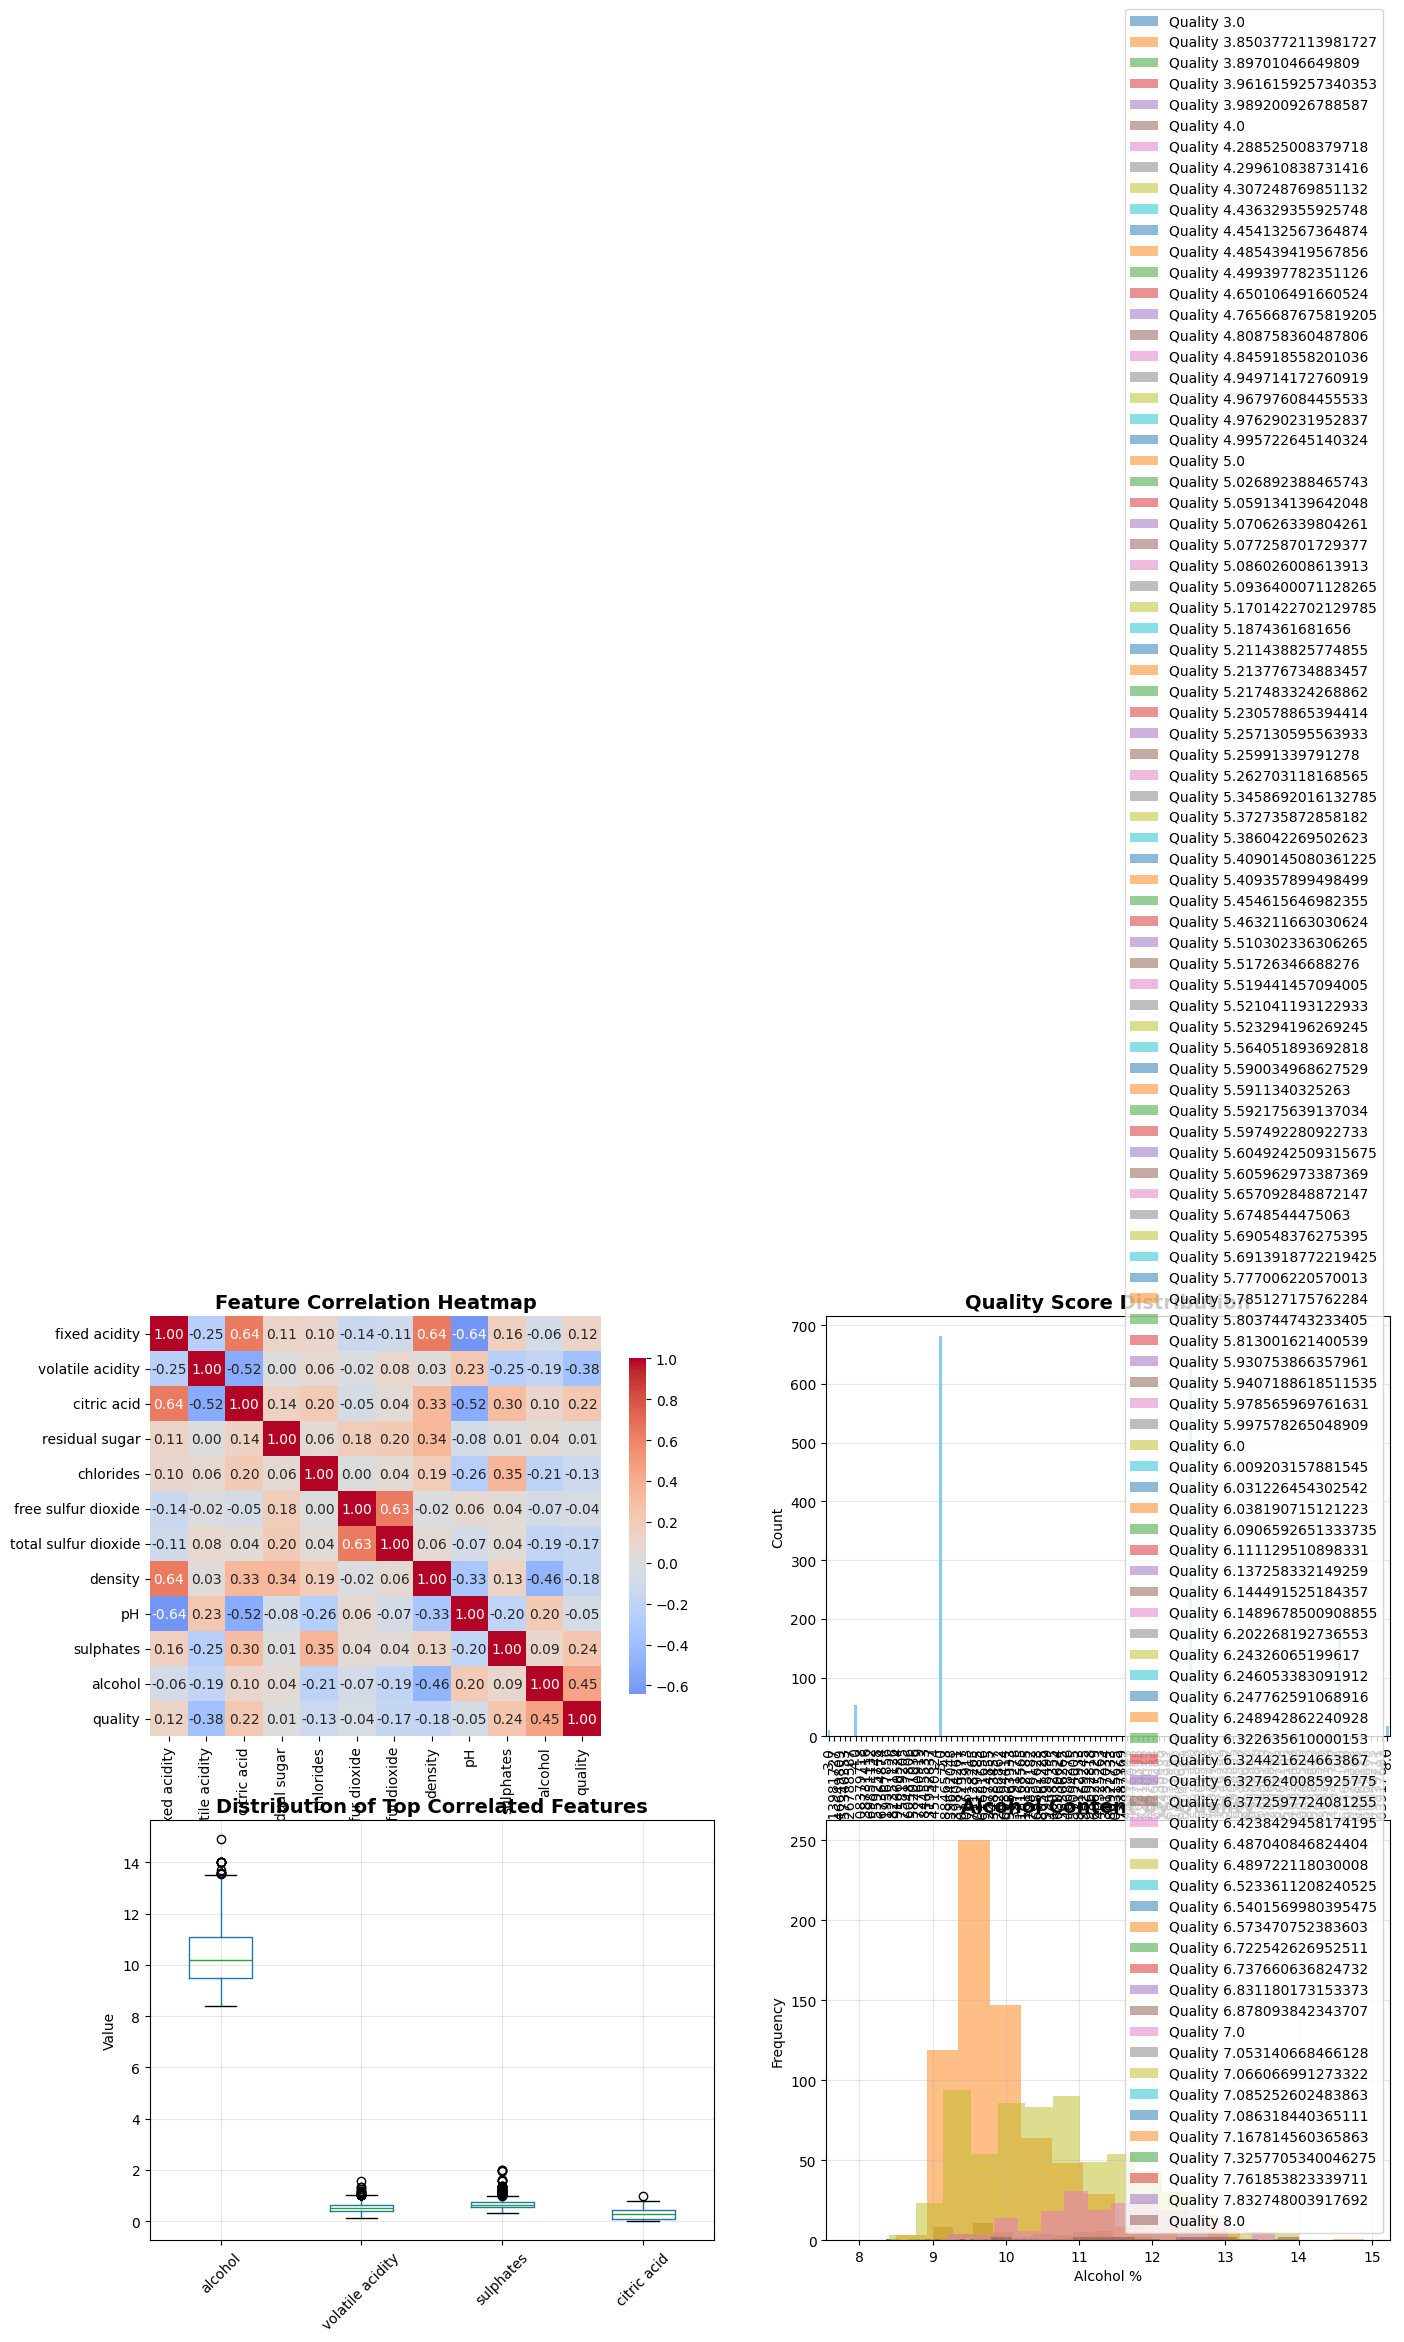

In [13]:
correlations = df.corr()['quality'].sort_values(ascending=False)

# Create quality categories
df['quality_category'] = pd.cut(df['quality'], 
                                bins=[0, 5, 6, 10], 
                                labels=['Low', 'Medium', 'High'])

print(f"\nQuality categories:")
print(df['quality_category'].value_counts())
print("\nFeatures correlation with quality:")
print(correlations)

# Visualization 1: Correlation heatmap
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap - only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[0, 0], cbar_kws={'shrink': 0.8})
axes[0, 0].set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

# Quality distribution
df['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Quality Score Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Quality Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# Box plot for key features
top_features = correlations.abs().nlargest(5).index[1:]  # Exclude quality itself
df[top_features].boxplot(ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Top Correlated Features', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Value')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3)

# Alcohol vs Quality
for quality in sorted(df['quality'].unique()):
    data = df[df['quality'] == quality]['alcohol']
    axes[1, 1].hist(data, alpha=0.5, label=f'Quality {quality}', bins=15)
axes[1, 1].set_title('Alcohol Content by Quality', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Alcohol %')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()

Feature Engineering

In [22]:
df['total_acidity']=df['fixed acidity']+df['volatile acidity']
df['free_sulfur_ratio']=df['free sulfur dioxide']/(df['total sulfur dioxide']+1)
df['alcohol_density_ratio']=df['alcohol']/df['density']
df['acidity_sugar_ratio']=df['total_acidity']/(df['residual sugar'])


df['is_good_quality']=(df['quality']>=6).astype(int)

In [23]:
print(f"Good Quality (>6): {(df['is_good_quality']==1).sum()}")
print(f"bad quality(<6) : {(df['is_good_quality']==0).sum()}")

Good Quality (>6): 890
bad quality(<6) : 809


Data Preparation


In [24]:
feature_columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide',
                   'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                   'alcohol', 'total_acidity', 'free_sulfur_ratio',
                   'alcohol_density_ratio', 'acidity_sugar_ratio']


In [25]:
X=df[feature_columns]
y=df['is_good_quality']

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [27]:
pipelines={
    "Logistic Regression":Pipeline([
        ('scaler',StandardScaler()),
        ('model',LogisticRegression(max_iter=1000,random_state=42))
    ]),

    "Random Forest":Pipeline([
        ("model",RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            random_state=42
        ))
    ]),
    "Gradient Boosting":Pipeline([
        ('model',GradientBoostingClassifier(
            n_estimators=200,
            random_state=42
        ))
    ])
}

In [30]:
results={}

for name,pipe in pipelines.items():
    print(f" Training {name}")
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    cv_scores=cross_val_score(pipe,X_train,y_train,cv=5,scoring="accuracy")

    results[name]=accuracy
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"CV Mean: {cv_scores.mean():.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))




 Training Logistic Regression
Accuracy: 0.7382
F1 Score: 0.7507
CV Mean: 0.7219

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       162
           1       0.75      0.75      0.75       178

    accuracy                           0.74       340
   macro avg       0.74      0.74      0.74       340
weighted avg       0.74      0.74      0.74       340

 Training Random Forest
Accuracy: 0.8088
F1 Score: 0.8189
CV Mean: 0.7815

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       162
           1       0.81      0.83      0.82       178

    accuracy                           0.81       340
   macro avg       0.81      0.81      0.81       340
weighted avg       0.81      0.81      0.81       340

 Training Gradient Boosting
Accuracy: 0.7941
F1 Score: 0.8045
CV Mean: 0.7675

Classification Report:
              precision    recall  f1-scor